# Install Packages

In [101]:
install.packages("caret")
install.packages("corrr")
install.packages("dplyr")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



# Read CSV

In [14]:
df <- read.csv("ObesityDataSet.csv")
head(df)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
2,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
3,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
4,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
5,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
6,Male,29,1.62,53.0,no,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Automobile,Normal_Weight


In [20]:
sprintf("data dimension: %d %d", dim(df)[1], dim(df)[2])
sapply(df, class)

[1] "data dimension: 2111 17"

Gender                            Age 
                   "character"                      "numeric" 
                        Height                         Weight 
                     "numeric"                      "numeric" 
family_history_with_overweight                           FAVC 
                   "character"                    "character" 
                          FCVC                            NCP 
                     "numeric"                      "numeric" 
                          CAEC                          SMOKE 
                   "character"                    "character" 
                          CH2O                            SCC 
                     "numeric"                    "character" 
                           FAF                            TUE 
                     "numeric"                      "numeric" 
                          CALC                         MTRANS 
                   "character"                    "character" 
                    NObeyesdad 
                   "character"

# EDA

In [125]:
cleaned_df <- transform(df, 
                        Gender = as.factor(Gender), 
                        Age = as.integer(Age),
                        family_history_with_overweight = as.factor(family_history_with_overweight), 
                        FAVC = as.factor(FAVC), 
                        FCVC = as.integer(FCVC),
                        NCP = as.integer(NCP),
                        CAEC = as.factor(CAEC),
                        SMOKE = as.factor(SMOKE), 
                        SCC = as.factor(SCC), 
                        FAF = as.integer(FAF),
                        TUE = as.integer(TUE),
                        CALC = as.factor(CALC), 
                        MTRANS = as.factor(MTRANS), 
                        NObeyesdad = as.factor(NObeyesdad))
head(cleaned_df)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
,<fct>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<dbl>,<fct>,<int>,<int>,<fct>,<fct>,<fct>
1,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
2,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
3,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
4,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
5,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
6,Male,29,1.62,53.0,no,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Automobile,Normal_Weight


In [50]:
sapply(df, function(x)all(is.na(x)))

Gender                            Age 
                         FALSE                          FALSE 
                        Height                         Weight 
                         FALSE                          FALSE 
family_history_with_overweight                           FAVC 
                         FALSE                          FALSE 
                          FCVC                            NCP 
                         FALSE                          FALSE 
                          CAEC                          SMOKE 
                         FALSE                          FALSE 
                          CH2O                            SCC 
                         FALSE                          FALSE 
                           FAF                            TUE 
                         FALSE                          FALSE 
                          CALC                         MTRANS 
                         FALSE                          FALSE 
                    NObeyesdad 
                         FALSE

## Plotting

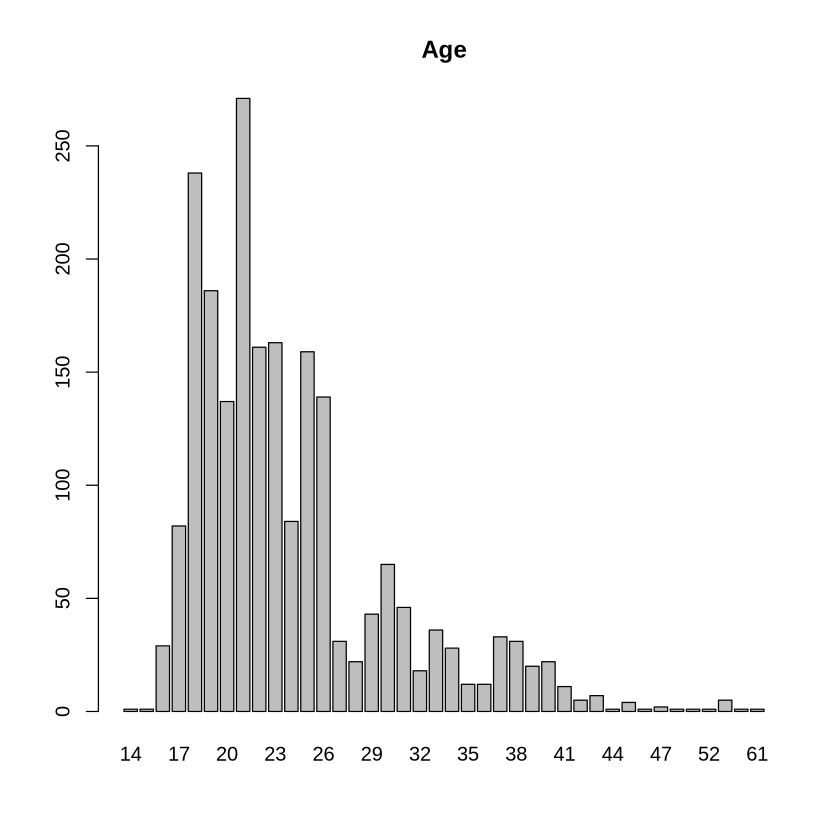

In [120]:
barplot(table(cleaned_df$Age), main="Age")

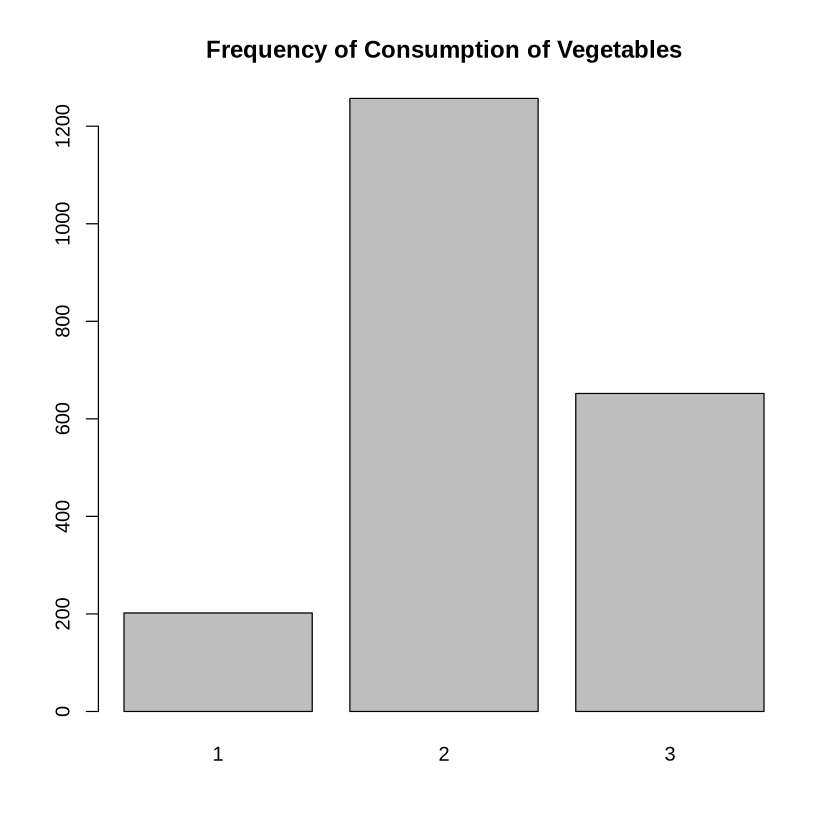

In [121]:
barplot(table(cleaned_df$FCVC), main="Frequency of Consumption of Vegetables")

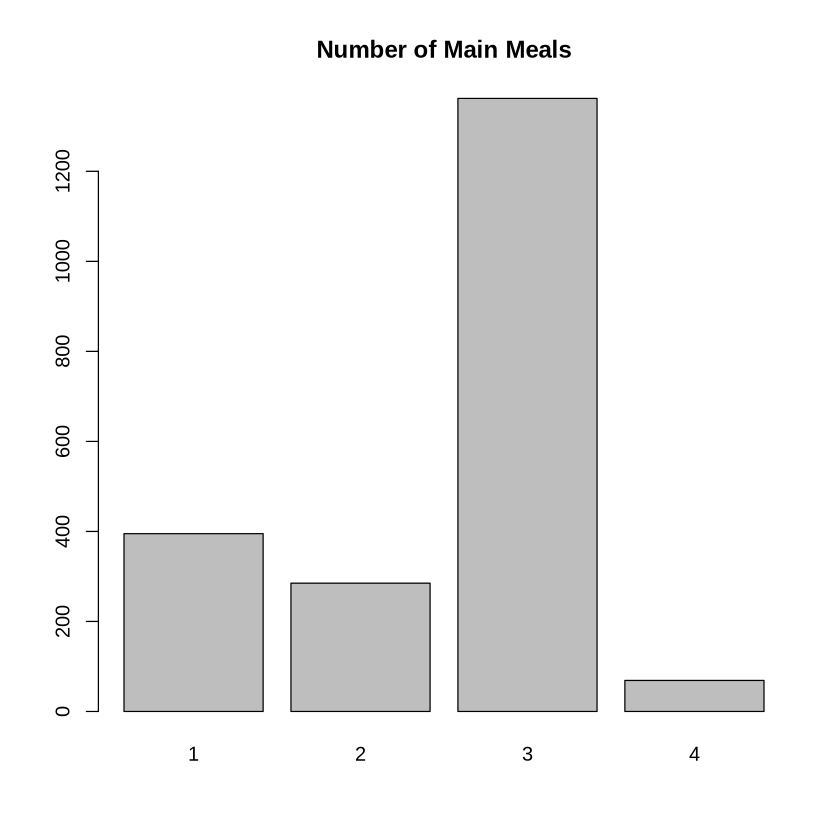

In [122]:
barplot(table(cleaned_df$NCP), main="Number of Main Meals")

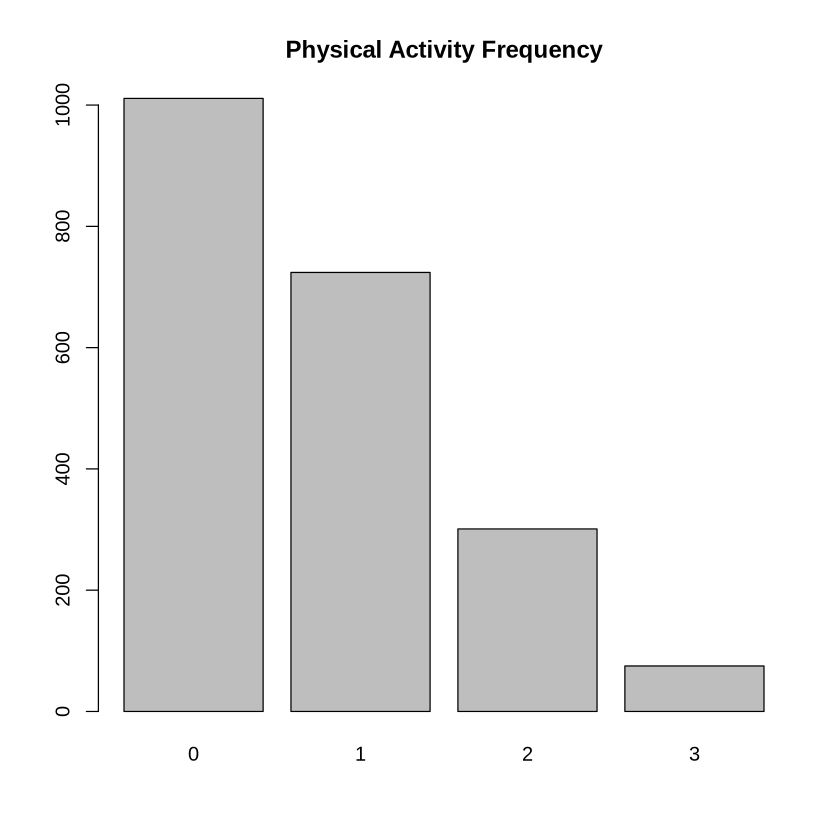

In [123]:
barplot(table(cleaned_df$FAF), main="Physical Activity Frequency")

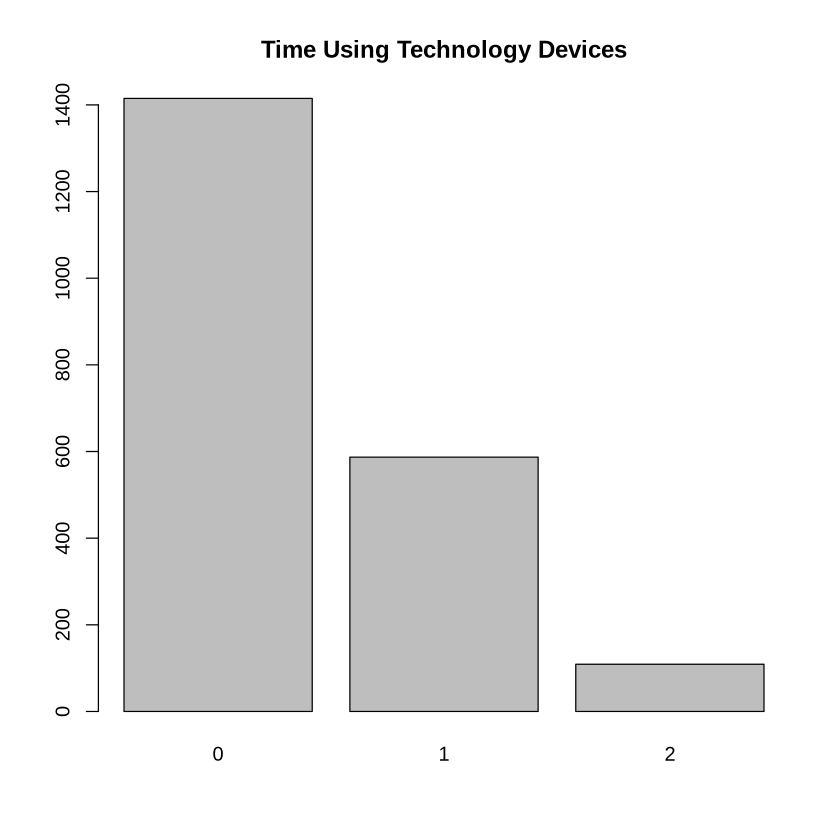

In [128]:
barplot(table(cleaned_df$TUE), main="Time Using Technology Devices")

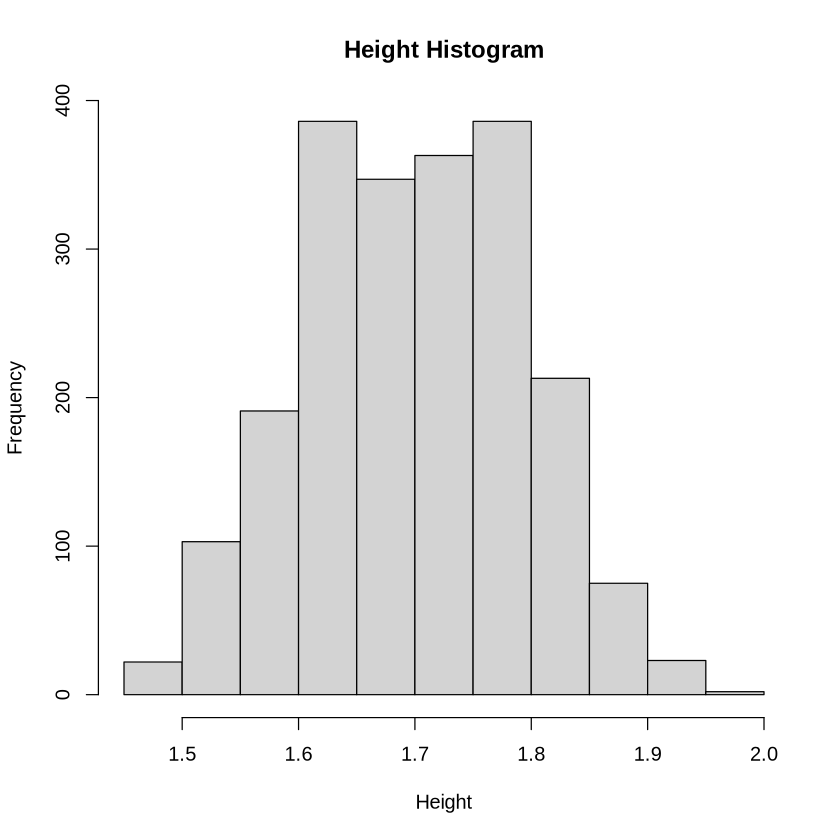

In [134]:
hist(cleaned_df$Height, xlab="Height", main="Height Histogram")

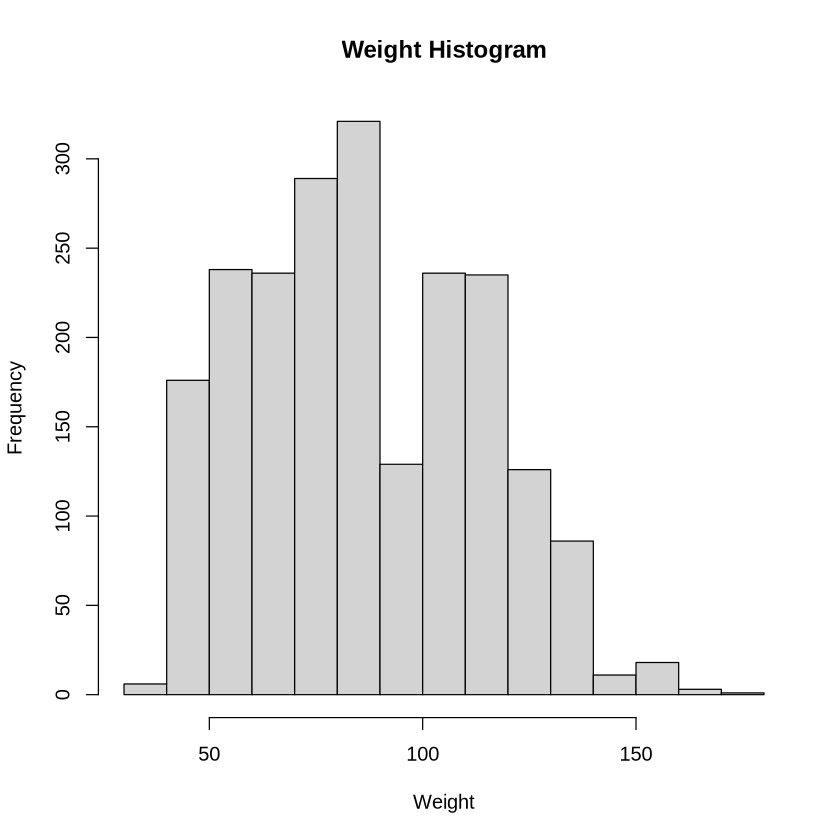

In [135]:
hist(cleaned_df$Weight, xlab="Weight", main="Weight Histogram")


Female   Male 
  1043   1068 


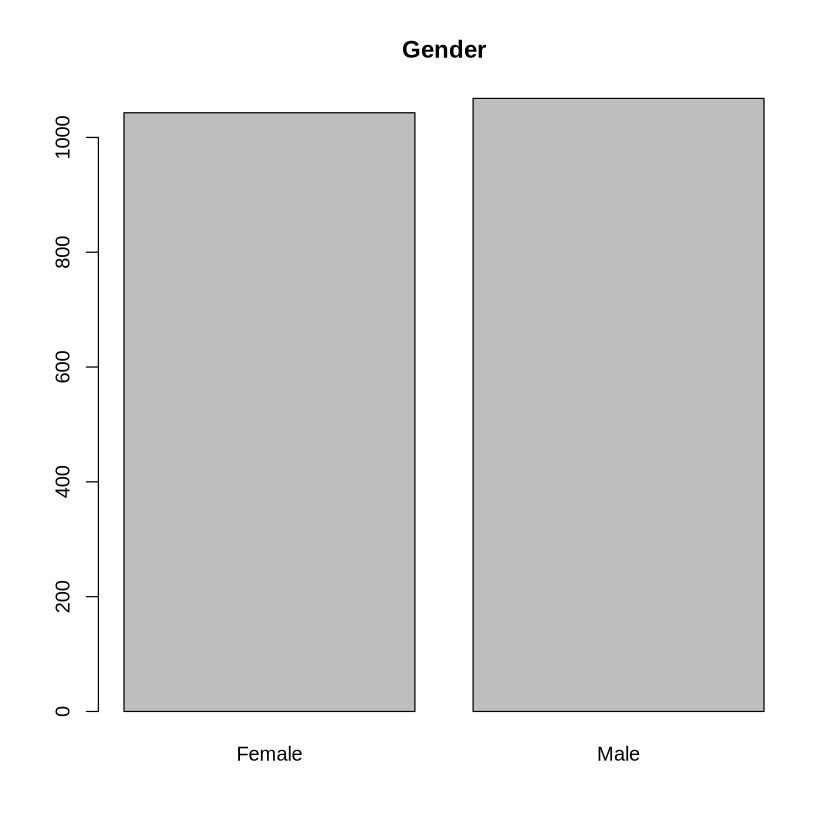

In [106]:
print(table(cleaned_df$Gender))
barplot(table(cleaned_df$Gender), main="Gender")


  no  yes 
 385 1726 


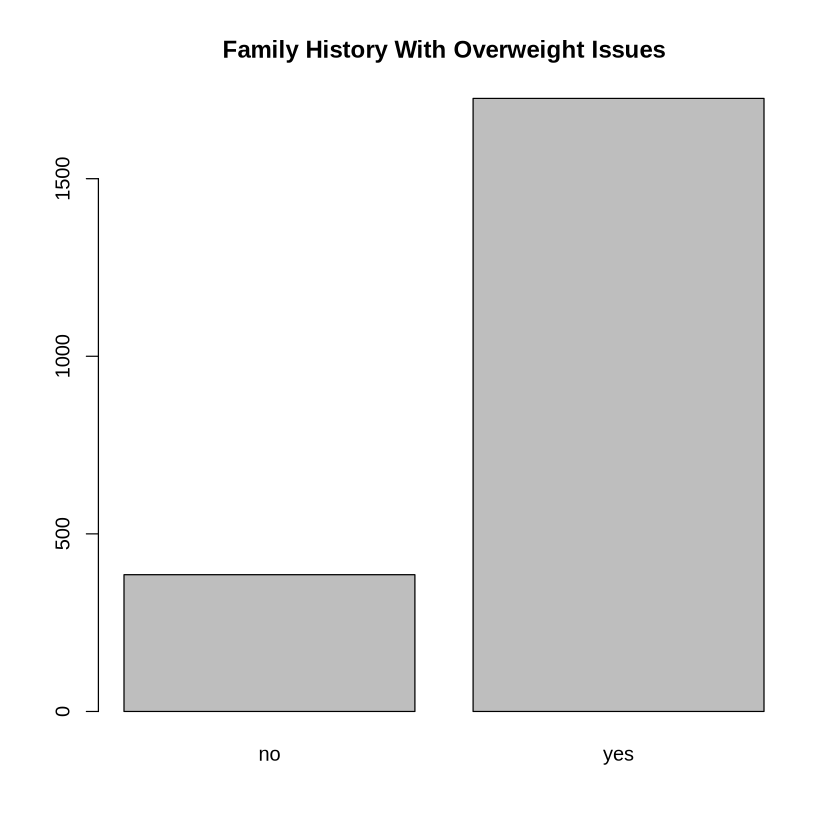

In [107]:
print(table(cleaned_df$family_history_with_overweight))
barplot(table(cleaned_df$family_history_with_overweight), main="Family History With Overweight Issues")


  no  yes 
 245 1866 


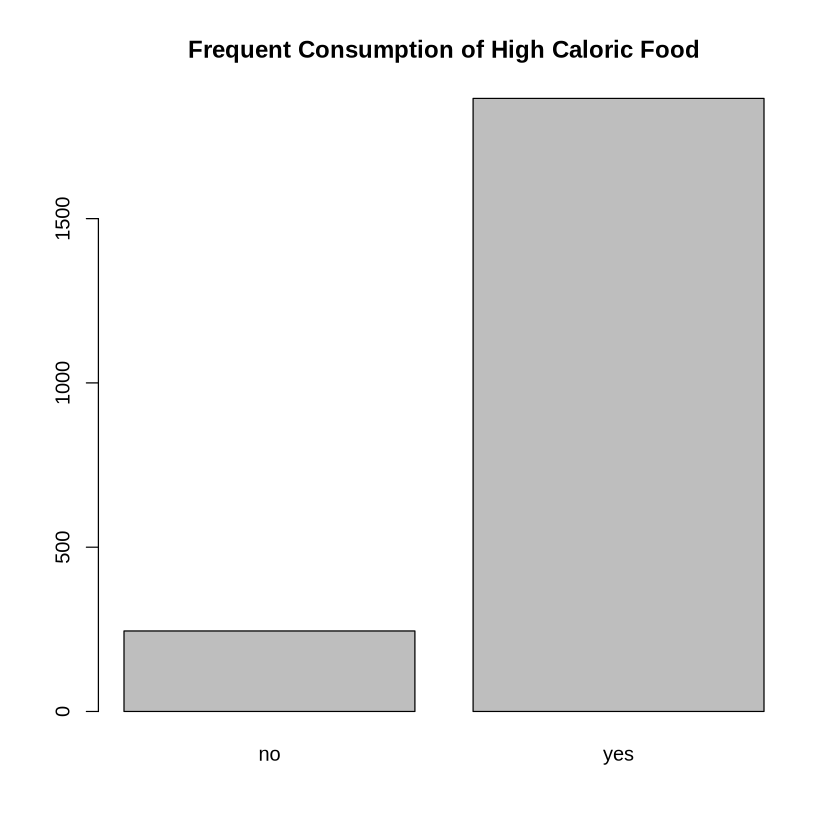

In [108]:
print(table(cleaned_df$FAVC))
barplot(table(cleaned_df$FAVC), main="Frequent Consumption of High Caloric Food")


    Always Frequently         no  Sometimes 
        53        242         51       1765 


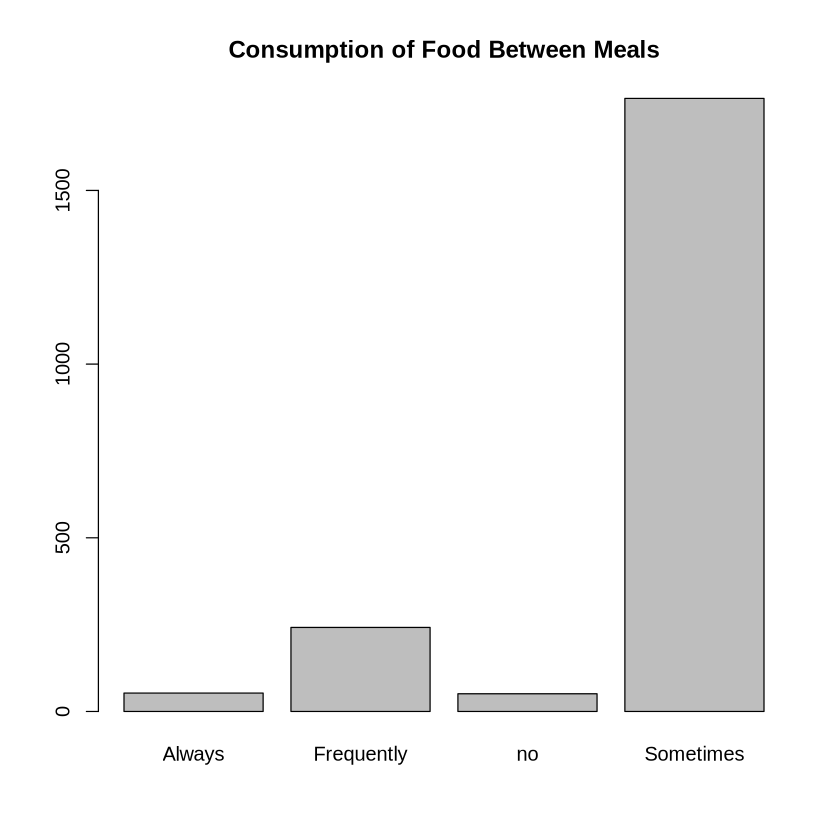

In [109]:
print(table(cleaned_df$CAEC))
barplot(table(cleaned_df$CAEC), main="Consumption of Food Between Meals")


  no  yes 
2067   44 


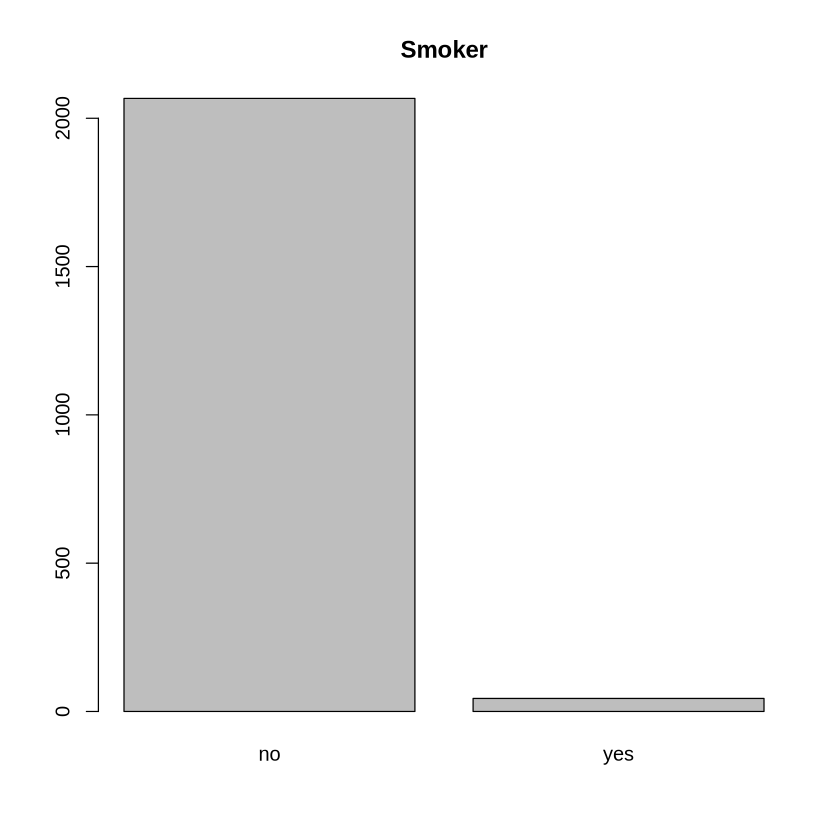

In [110]:
print(table(cleaned_df$SMOKE))
barplot(table(cleaned_df$SMOKE), main="Smoker")


  no  yes 
2015   96 


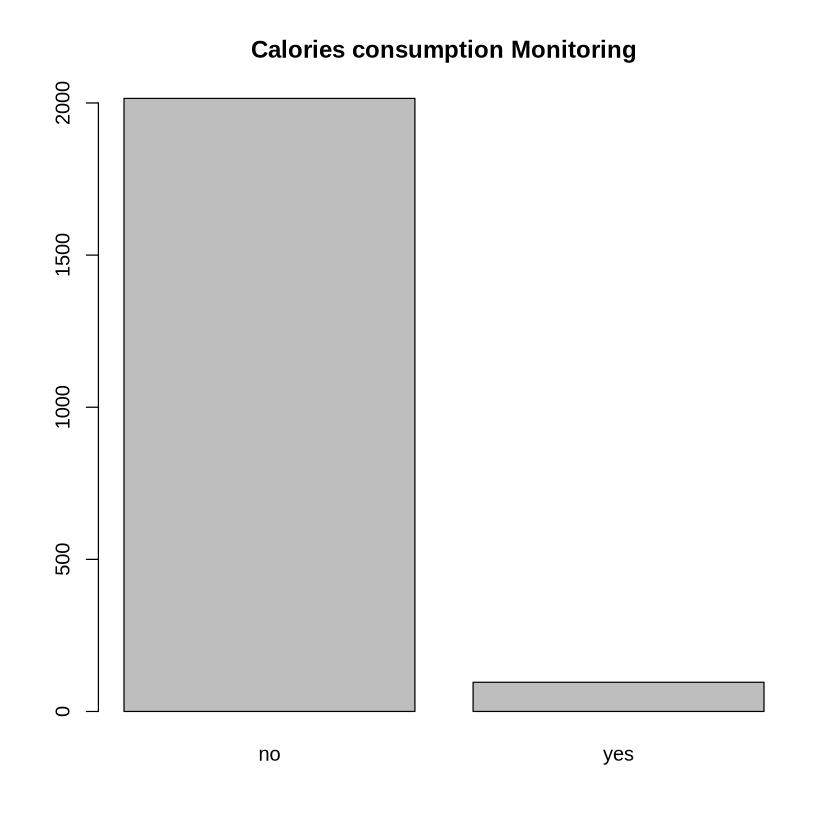

In [111]:
print(table(cleaned_df$SCC))
barplot(table(cleaned_df$SCC), main="Calories consumption Monitoring")


    Always Frequently         no  Sometimes 
         1         70        639       1401 


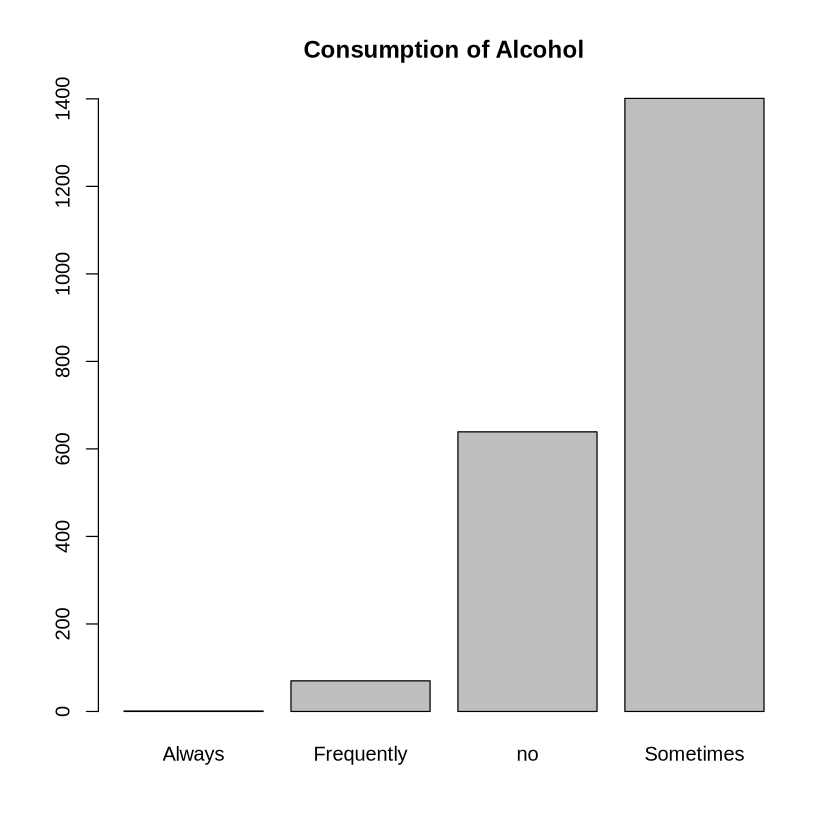

In [112]:
print(table(cleaned_df$CALC))
barplot(table(cleaned_df$CALC), main="Consumption of Alcohol")


           Automobile                  Bike             Motorbike 
                  457                     7                    11 
Public_Transportation               Walking 
                 1580                    56 


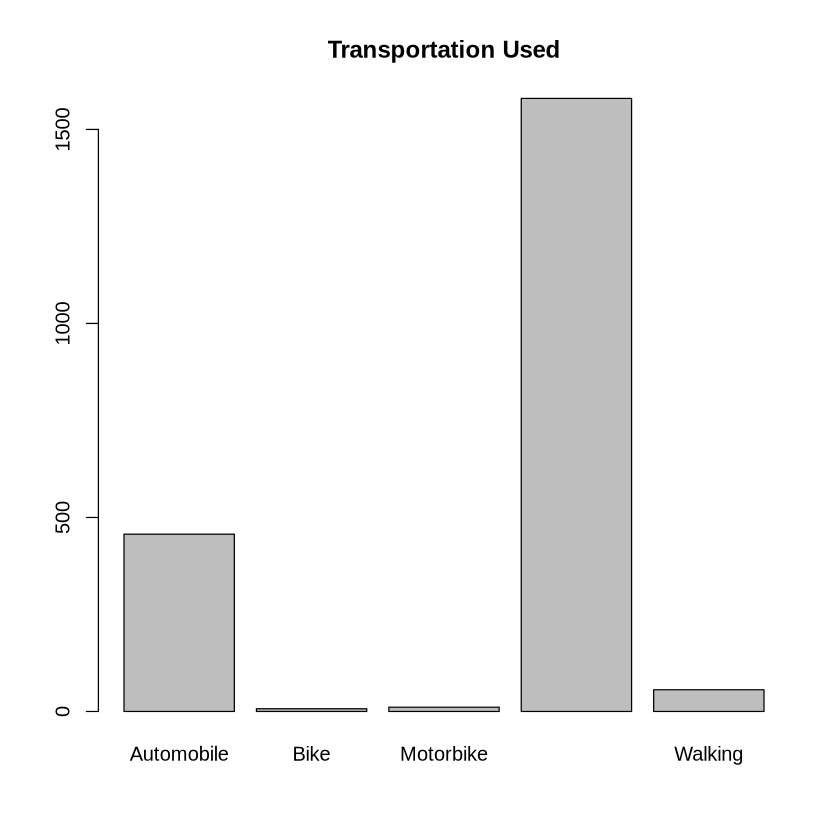

In [113]:
print(table(cleaned_df$MTRANS))
barplot(table(cleaned_df$MTRANS), main="Transportation Used")

## Find Correlations

In [114]:
corrr::correlate(cleaned_df, method = "spearman")

Non-numeric variables removed from input: `Gender`, `family_history_with_overweight`, `FAVC`, `CAEC`, `SMOKE`, `SCC`, `CALC`, `MTRANS`, and `NObeyesdad`
Correlation computed with
• Method: 'spearman'
• Missing treated using: 'pairwise.complete.obs'


term,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Age,NA,-0.009824782,0.33883715,0.01332190,-0.08111149,0.008290269,-0.23353787,-0.30615768
Height,-0.009824782,NA,0.46254814,-0.08964151,0.19514325,0.225237195,0.26899771,0.08154810
Weight,0.338837149,0.462548144,NA,0.17134422,0.08011638,0.225592359,-0.13260538,-0.04986969
FCVC,0.013321900,-0.089641508,0.17134422,NA,0.16528981,0.093946370,0.01055125,-0.10419098
NCP,-0.081111491,0.195143250,0.08011638,0.16528981,NA,0.086478765,0.12483916,0.07132037
CH2O,0.008290269,0.225237195,0.22559236,0.09394637,0.08647877,NA,0.16460834,0.02316174
FAF,-0.233537874,0.268997708,-0.13260538,0.01055125,0.12483916,0.164608339,NA,0.02851653
TUE,-0.306157681,0.081548096,-0.04986969,-0.10419098,0.07132037,0.023161744,0.02851653,NA
